<a href="https://colab.research.google.com/github/gumendes/projeto_idosos_atividade_fisica/blob/main/01_exploracao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Número de registros: 520
Número de colunas: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_participante  520 non-null    int64         
 1   idade            520 non-null    int64         
 2   sexo             520 non-null    object        
 3   data             520 non-null    datetime64[ns]
 4   atividade        520 non-null    object        
 5   presenca         520 non-null    int64         
 6   clima            520 non-null    object        
 7   duracao_min      520 non-null    int64         
 8   satisfacao       520 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 36.7+ KB


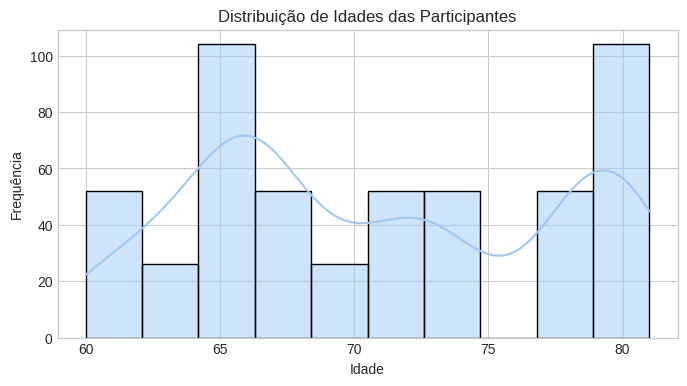

Taxa média de presença geral: 63.3%


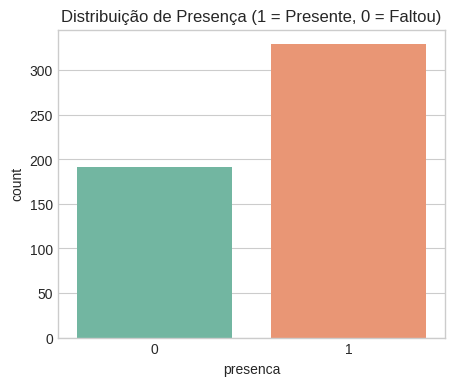

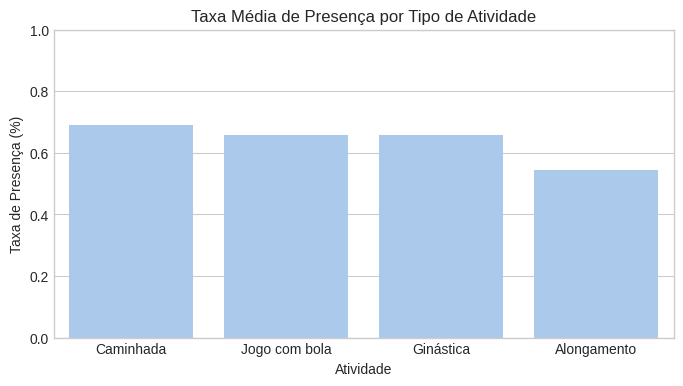

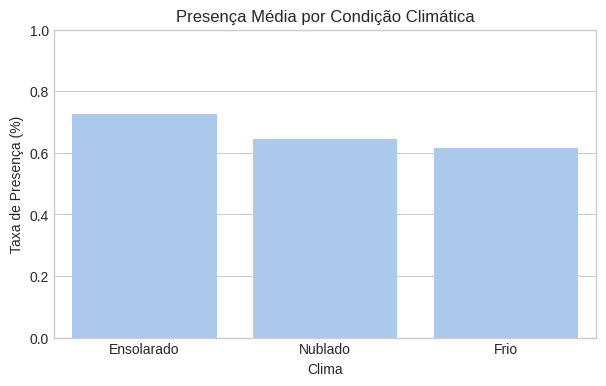

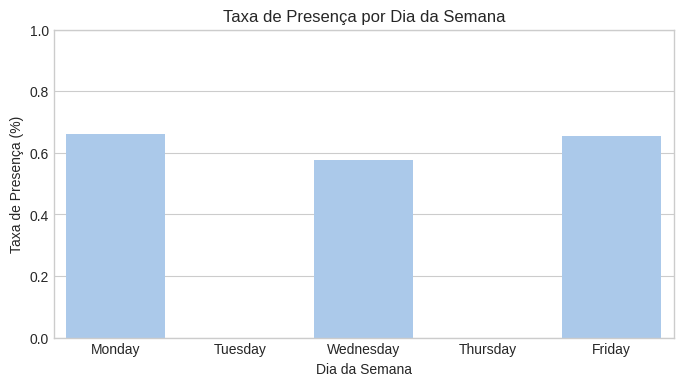

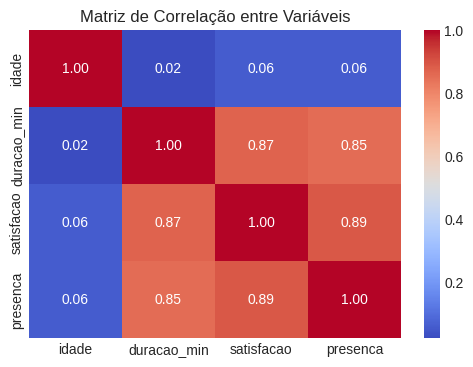

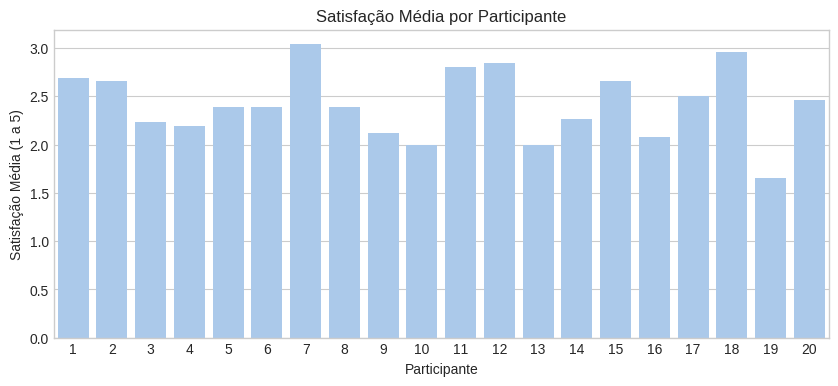

In [ ]:
# Importação de bibliotecas

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

# Leitura da base
df = pd.read_excel('/content/dados_idosos_simulados_v2.xlsx')
df.head()


# Dimensões da base
print("Número de registros:", df.shape[0])
print("Número de colunas:", df.shape[1])

# Tipos de dados
df.info()

# Estatísticas básicas
df.describe(include='all')

# Verificar valores nulos
df.isna().sum()

# Converter a coluna de data
df['data'] = pd.to_datetime(df['data'])

# Criar colunas auxiliares
df['dia_semana'] = df['data'].dt.day_name()
df['mes'] = df['data'].dt.month_name()

df.head()

plt.figure(figsize=(8,4))
sns.histplot(df['idade'], bins=10, kde=True)
plt.title('Distribuição de Idades das Participantes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Percentual de presença geral
presenca_rate = df['presenca'].mean() * 100
print(f"Taxa média de presença geral: {presenca_rate:.1f}%")

# Contagem de presenças e faltas
plt.figure(figsize=(5,4))
sns.countplot(x='presenca', data=df, palette='Set2')
plt.title('Distribuição de Presença (1 = Presente, 0 = Faltou)')
plt.show()

presenca_atividade = df.groupby('atividade')['presenca'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=presenca_atividade.index, y=presenca_atividade.values)
plt.title('Taxa Média de Presença por Tipo de Atividade')
plt.ylabel('Taxa de Presença (%)')
plt.xlabel('Atividade')
plt.ylim(0,1)
plt.show()

presenca_clima = df.groupby('clima')['presenca'].mean().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=presenca_clima.index, y=presenca_clima.values)
plt.title('Presença Média por Condição Climática')
plt.ylabel('Taxa de Presença (%)')
plt.xlabel('Clima')
plt.ylim(0,1)
plt.show()

order_dias = ['Monday','Tuesday','Wednesday','Thursday','Friday']
presenca_dia = df.groupby('dia_semana')['presenca'].mean().reindex(order_dias)

plt.figure(figsize=(8,4))
sns.barplot(x=presenca_dia.index, y=presenca_dia.values)
plt.title('Taxa de Presença por Dia da Semana')
plt.ylabel('Taxa de Presença (%)')
plt.xlabel('Dia da Semana')
plt.ylim(0,1)
plt.show()

# Codificação para cálculo de correlação
df_corr = df.copy()
df_corr['presenca'] = df_corr['presenca'].astype(int)
df_corr['satisfacao'] = df_corr['satisfacao'].astype(int)

corr = df_corr[['idade','duracao_min','satisfacao','presenca']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

media_satisf = df.groupby('id_participante')['satisfacao'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x=media_satisf.index, y=media_satisf.values)
plt.title('Satisfação Média por Participante')
plt.ylabel('Satisfação Média (1 a 5)')
plt.xlabel('Participante')
plt.show()

